# Data Understanding

Dataset yang digunakan adalah data Indeks Standar Pencemaran Udara di Provinsi DKI Jakarta secara harian dari bulan Januari 2010 hingga Juli 2021 yang bersumber dari [Open Data Jakarta](https://data.jakarta.go.id). Data ini tersedia dalam ekstensi `.csv` dan terpisah secara bulanan.

### About Dataset

Sumber : Dinas Lingkungan Hidup Provinsi DKI Jakarta (tersedia melalui Open Data Jakarta)

Frekuensi Penerbitan : 1 Bulan Sekali

Tahun : 2010 - 2021

Cakupan : Provinsi DKI Jakarta

Penyajian : Provinsi DKI Jakarta

Kontak : dinaslh@jakarta.go.id

Rujukan : lingkunganhidup.jakarta.go.id

Lisensi : [Creative Commons Attribution](https://www.opendefinition.org/licenses/cc-by)

## Loading Data

Sebelumnya saya telah mengunduh dataset dan mengunggahnya ke GitHub agar mudah untuk diakses. Untuk itu perlu mendownload dataset dari GitHub menggunakan wget terlebih dahulu, kemudian mengekstraknya.

In [2]:
# Import Library
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [1]:
# Download Data
!wget https://github.com/aulialigar/Capstone_SIB_Dicoding/raw/main/datasets/datasets_ispu_dki_2010_2021.zip

--2021-12-08 01:05:27--  https://github.com/aulialigar/Capstone_SIB_Dicoding/raw/main/datasets/datasets_ispu_dki_2010_2021.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aulialigar/Capstone_SIB_Dicoding/main/datasets/datasets_ispu_dki_2010_2021.zip [following]
--2021-12-08 01:05:27--  https://raw.githubusercontent.com/aulialigar/Capstone_SIB_Dicoding/main/datasets/datasets_ispu_dki_2010_2021.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111150 (109K) [application/zip]
Saving to: ‘datasets_ispu_dki_2010_2021.zip’

datasets_ispu_dki_2 100%[===================>] 108.54K  --.-KB/s    in 0

In [4]:
# Ekstrak berkas dataset yang terkompres zip
!unzip datasets_ispu_dki_2010_2021.zip -d datasets/

Archive:  datasets_ispu_dki_2010_2021.zip
   creating: datasets/ispu_dki_2016/
  inflating: datasets/ispu_dki_2016/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-agustus-tahun-2016.csv  
  inflating: datasets/ispu_dki_2016/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-april-tahun-2016.csv  
  inflating: datasets/ispu_dki_2016/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-desember-tahun-2016.csv  
  inflating: datasets/ispu_dki_2016/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-februari-tahun-2016.csv  
  inflating: datasets/ispu_dki_2016/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2016.csv  
  inflating: datasets/ispu_dki_2016/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juli-tahun-2016.csv  
  inflating: datasets/ispu_dki_2016/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juni-tahun-2016.csv  
  inflating: datasets/ispu_dki_2016/indeks-standar-pencemar-udara-di-provinsi-dk

Setelah dilakukan ekstrak pada berkas zip, dapat diketahui bahwa dataset berisi 12 direktori tahun 2010 hingga tahun 2021 yang mana di dalamnya terdapat berkas csv yang merupakan data Indeks Standar Pencemaran Udara secara harian dari bulan Januari hingga bulan Desember. Namun untuk data tahun 2021 hanya tersedia dari bulan Januari hingga Juli.

Untuk mengetahui fitur-fitur yang ada pada dataset, berikut ini dilakukan pengecekan sampel data per tahun.

In [5]:
# Memuat sampel dataset bulan Januari tiap tahun
sample2010 = pd.read_csv('datasets/ispu_dki_2010/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2010.csv')
sample2011 = pd.read_csv('datasets/ispu_dki_2011/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2011.csv')
sample2012 = pd.read_csv('datasets/ispu_dki_2012/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2012.csv')
sample2013 = pd.read_csv('datasets/ispu_dki_2013/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2013.csv')
sample2014 = pd.read_csv('datasets/ispu_dki_2014/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2014.csv')
sample2015 = pd.read_csv('datasets/ispu_dki_2015/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2015.csv')
sample2016 = pd.read_csv('datasets/ispu_dki_2016/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2016.csv')
sample2017 = pd.read_csv('datasets/ispu_dki_2017/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2017.csv')
sample2018 = pd.read_csv('datasets/ispu_dki_2018/data-indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2018.csv')
sample2019 = pd.read_csv('datasets/ispu_dki_2019/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2019.csv')
sample2020 = pd.read_csv('datasets/ispu_dki_2020/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2020.csv')
sample2021 = pd.read_csv('datasets/ispu_dki_2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2021.csv')

In [6]:
# Menampilkan ringkasan informasi dataset Januari 2010
sample2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     object
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [7]:
# Menampilkan ringkasan informasi dataset Januari 2011
sample2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     object
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [8]:
# Menampilkan ringkasan informasi dataset Januari 2012
sample2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     int64 
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
 10  Unnamed: 10  31 non-null     object
dtypes: int64(7), object(4)
memory usage: 2.8+ KB


In [9]:
# Menampilkan ringkasan informasi dataset Januari 2013
sample2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     object
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [10]:
# Menampilkan ringkasan informasi dataset Januari 2014
sample2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     object
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [11]:
# Menampilkan ringkasan informasi dataset Januari 2015
sample2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     object
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [12]:
# Menampilkan ringkasan informasi dataset Januari 2016
sample2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     object
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [13]:
# Menampilkan ringkasan informasi dataset Januari 2017
sample2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     object
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [14]:
# Menampilkan ringkasan informasi dataset Januari 2018
sample2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tanggal      31 non-null     object 
 1   pm10         38 non-null     object 
 2   so2          31 non-null     float64
 3   co           31 non-null     float64
 4   o3           38 non-null     float64
 5   no2          31 non-null     float64
 6   max          38 non-null     object 
 7   critical     31 non-null     object 
 8   categori     38 non-null     object 
 9   lokasi_spku  31 non-null     object 
dtypes: float64(4), object(6)
memory usage: 11.4+ KB


In [15]:
# Menampilkan ringkasan informasi dataset Januari 2019
sample2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     object
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [16]:
# Menampilkan ringkasan informasi dataset Januari 2020
sample2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      31 non-null     object
 1   pm10         31 non-null     int64 
 2   so2          31 non-null     int64 
 3   co           31 non-null     int64 
 4   o3           31 non-null     int64 
 5   no2          31 non-null     int64 
 6   max          31 non-null     int64 
 7   critical     31 non-null     object
 8   categori     31 non-null     object
 9   lokasi_spku  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


In [17]:
# Menampilkan ringkasan informasi dataset Januari 2021
sample2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   31 non-null     object
 1   pm10      31 non-null     int64 
 2   so2       31 non-null     int64 
 3   co        31 non-null     int64 
 4   o3        31 non-null     int64 
 5   no2       31 non-null     int64 
 6   max       31 non-null     int64 
 7   critical  31 non-null     object
 8   categori  31 non-null     object
 9   location  31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.5+ KB


Dari sampel tahunan di atas, dapat diketahui bahwa tiap dataset mungkin memiliki nama fitur atau kolom yang tidak sama. Hal ini akan dilakukan pra-pemrosesan lebih lanjut. Namun secara umum data ini berisi 10 fitur atau kolom, diantaranya:

1. `tanggal` : Tanggal pengukuran kualitas udara 
2. `pm10` : Partikulat salah satu parameter yang diukur
3. `so2` : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur
4. `co` : Carbon Monoksida salah satu parameter yand diukur
5. `o3` : Ozon salah satu parameter yang diukur
6. `no2` : NItrogen dioksida salah satu parameter yang diukur
7. `max` : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama
8. `critical` : Parameter yang hasil pengukurannya paling tinggi
9. `categori` : Kategori hasil perhitungan indeks standar pencemaran udara
10. `lokasi_spku` : Lokasi pengukuran di stasiun

# Data Preprocessing

Data Preprocessing dilakukan untuk membersihkan serta merapikan data hingga siap untuk digunakan dalam pengembangan model.

## Rename and Sort Data

Sebelumnya telah diketahui bahwa dataset ini terdiri dari banyak berkas csv yang terpisah-pisah. Untuk memudahkan penggabungan data-data ini, maka dilakukan penamaan ulang nama berkas. Penamaan ulang ini berguna untuk mengurutkan data dan melakukan penggabungan dengan looping.

In [18]:
# Direktori dataset
path = '/content/datasets'

In [19]:
# Mendefinisikan fungsi untuk melakukan sorting
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]


# List direktori
alist = os.listdir(path)

# Mengurutkan direktori
alist.sort(key=natural_keys)

# Menampilkan jumlah direktori dan urutan direktori
print(len(alist))
print(alist)

12
['ispu_dki_2010', 'ispu_dki_2011', 'ispu_dki_2012', 'ispu_dki_2013', 'ispu_dki_2014', 'ispu_dki_2015', 'ispu_dki_2016', 'ispu_dki_2017', 'ispu_dki_2018', 'ispu_dki_2019', 'ispu_dki_2020', 'ispu_dki_2021']


In [20]:
# Mendefinisikan dictionary bulan sebagai referensi saat melakukan rename file
bulan = {"januari":"01","februari":"02","maret": "03", "april": "04", "mei": "05", "juni": "06", "juli": "07", "agustus": "08", 
         "september": "09", "oktober": "10", "november": "11","desember":"12"}

# Looping untuk rename berkas csv
for a in alist:
    for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, a)):
        for name in filenames:
            if name.endswith('.csv'):
                temp = re.search('bulan-([a-z]+)-tahun-(\d+)', name) # Mendapatkan nama bulan
                new_name = "ispu_dki_" + bulan[temp.group(1)] + "_" + str(temp.group(2)) + ".csv" # Membuat nama baru berdasarkan dict bulan
                os.rename(os.path.join(path, a, name), os.path.join(path, a, new_name)) # Rename file dengan nama baru

In [21]:
# Menampilkan daftar berkas yang telah di-rename
for a in alist:
    for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, a)):
        filenames.sort(key=natural_keys)
        for name in filenames:
            print(name)

ispu_dki_01_2010.csv
ispu_dki_02_2010.csv
ispu_dki_03_2010.csv
ispu_dki_04_2010.csv
ispu_dki_05_2010.csv
ispu_dki_06_2010.csv
ispu_dki_07_2010.csv
ispu_dki_08_2010.csv
ispu_dki_09_2010.csv
ispu_dki_10_2010.csv
ispu_dki_11_2010.csv
ispu_dki_12_2010.csv
ispu_dki_01_2011.csv
ispu_dki_02_2011.csv
ispu_dki_03_2011.csv
ispu_dki_04_2011.csv
ispu_dki_05_2011.csv
ispu_dki_06_2011.csv
ispu_dki_07_2011.csv
ispu_dki_08_2011.csv
ispu_dki_09_2011.csv
ispu_dki_10_2011.csv
ispu_dki_11_2011.csv
ispu_dki_12_2011.csv
ispu_dki_01_2012.csv
ispu_dki_02_2012.csv
ispu_dki_03_2012.csv
ispu_dki_04_2012.csv
ispu_dki_05_2012.csv
ispu_dki_06_2012.csv
ispu_dki_07_2012.csv
ispu_dki_08_2012.csv
ispu_dki_09_2012.csv
ispu_dki_10_2012.csv
ispu_dki_11_2012.csv
ispu_dki_12_2012.csv
ispu_dki_01_2013.csv
ispu_dki_02_2013.csv
ispu_dki_03_2013.csv
ispu_dki_04_2013.csv
ispu_dki_05_2013.csv
ispu_dki_06_2013.csv
ispu_dki_07_2013.csv
ispu_dki_08_2013.csv
ispu_dki_09_2013.csv
ispu_dki_10_2013.csv
ispu_dki_11_2013.csv
ispu_dki_12_2

## Merge Data

Agar nantinya dapat dilakukan untuk mengembangkan model machine learning, maka dataset yang kini masih terpecah-pecah harus digabungkan menjadi satu terlebih dahulu. 

Namun seringkali ditemui dari pengambilan sampel sebelumnya, ditemukan bahwa tiap berkas csv mungkin memiliki struktur yang berbeda. Maka dari itu berikut ini dilakukan penggabungan data per tahun terlebih dahulu sembari mengecek ulang apakah ditemukan anomali atau hal-hal lain yang harus dibenahi.

### 2010

In [22]:
# Merge data Januari-Desember 2010
df_ispu_dki_2010 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[0])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2010 = pd.concat([df_ispu_dki_2010, df_temp], axis=0)


In [23]:
df_ispu_dki_2010

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2010-01-01,60,4,73,27,14,73,CO,SEDANG,DKI1
1,2010-01-02,32,2,16,33,9,33,O3,BAIK,DKI1
2,2010-01-03,27,2,19,20,9,27,PM10,BAIK,DKI1
3,2010-01-04,22,2,16,15,6,22,PM10,BAIK,DKI1
4,2010-01-05,25,2,17,15,8,25,PM10,BAIK,DKI1
...,...,...,...,...,...,...,...,...,...,...
26,2010-12-27,38,19,22,54,14,54,O3,SEDANG,DKI3
27,2010-12-28,45,15,23,57,17,57,O3,SEDANG,DKI4
28,2010-12-29,42,16,25,40,14,42,PM10,BAIK,DKI3
29,2010-12-30,38,18,24,40,15,40,O3,BAIK,DKI3


In [24]:
df_ispu_dki_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         365 non-null    int64         
 2   so2          365 non-null    int64         
 3   co           365 non-null    int64         
 4   o3           365 non-null    int64         
 5   no2          365 non-null    int64         
 6   max          365 non-null    int64         
 7   critical     362 non-null    object        
 8   categori     365 non-null    object        
 9   lokasi_spku  362 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 31.4+ KB


In [25]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2010[df_ispu_dki_2010.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [26]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada data yang tertukar
print(df_ispu_dki_2010.critical.unique())
print(df_ispu_dki_2010.categori.unique())
print(df_ispu_dki_2010.lokasi_spku.unique())

['CO' 'O3' 'PM10' nan]
['SEDANG' 'BAIK' 'TIDAK SEHAT' 'TIDAK ADA DATA' 'SANGAT TIDAK SEHAT']
['DKI1' nan 'DKI2' 'DKI3' 'DKI4']


### 2011

In [27]:
# Merge data Januari-Desember 2011
df_ispu_dki_2011 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[1])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2011 = pd.concat([df_ispu_dki_2011, df_temp], axis=0)


In [28]:
df_ispu_dki_2011

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2011-01-01,52.0,17.0,51.0,76.0,7.0,76.0,O3,SEDANG,DKI3
1,2011-01-02,35.0,15.0,15.0,47.0,11.0,47.0,O3,BAIK,DKI1
2,2011-01-03,41.0,16.0,35.0,31.0,15.0,41.0,PM10,BAIK,DKI1
3,2011-01-04,53.0,17.0,19.0,77.0,11.0,77.0,O3,SEDANG,DKI3
4,2011-01-05,59.0,12.0,21.0,61.0,12.0,61.0,O3,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...
26,2011-12-27,46.0,15.0,35.0,90.0,12.0,90.0,O3,SEDANG,DKI2
27,2011-12-28,60.0,21.0,32.0,101.0,15.0,101.0,O3,TIDAK SEHAT,DKI2
28,2011-12-29,58.0,28.0,29.0,76.0,14.0,76.0,O3,SEDANG,DKI2
29,2011-12-30,55.0,22.0,33.0,81.0,10.0,81.0,O3,SEDANG,DKI2


In [29]:
df_ispu_dki_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         365 non-null    float64       
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           365 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          365 non-null    float64       
 7   critical     365 non-null    object        
 8   categori     365 non-null    object        
 9   lokasi_spku  365 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 32.0+ KB


In [30]:
# Menghapus data dengan missing value
df_ispu_dki_2011.dropna(inplace=True)

In [31]:
df_ispu_dki_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         365 non-null    float64       
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           365 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          365 non-null    float64       
 7   critical     365 non-null    object        
 8   categori     365 non-null    object        
 9   lokasi_spku  365 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 31.4+ KB


In [32]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2011[df_ispu_dki_2011.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [33]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada data yang tertukar
print(df_ispu_dki_2011.critical.unique())
print(df_ispu_dki_2011.categori.unique())
print(df_ispu_dki_2011.lokasi_spku.unique())

['O3' 'PM10' 'CO']
['SEDANG' 'BAIK' 'TIDAK SEHAT' 'SANGAT TIDAK SEHAT']
['DKI3' 'DKI1' 'DKI4' 'DKI2']


### 2012

In [34]:
# Merge data Januari-Desember 2012
df_ispu_dki_2012 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[2])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2012 = pd.concat([df_ispu_dki_2012, df_temp], axis=0)


In [35]:
df_ispu_dki_2012

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,Unnamed: 10
0,2012-01-01,52.0,18.0,39.0,63.0,7.0,63.0,4.0,O3,SEDANG,DKI2
1,2012-01-02,49.0,22.0,28.0,55.0,11.0,55.0,4.0,O3,SEDANG,DKI2
2,2012-01-03,65.0,15.0,42.0,86.0,22.0,86.0,4.0,O3,SEDANG,DKI1
3,2012-01-04,69.0,20.0,55.0,97.0,20.0,97.0,4.0,O3,SEDANG,DKI1
4,2012-01-05,67.0,14.0,39.0,157.0,25.0,157.0,4.0,O3,TIDAK SEHAT,DKI2
...,...,...,...,...,...,...,...,...,...,...,...
26,2012-12-27,45.0,6.0,30.0,218.0,12.0,218.0,4.0,O3,SANGAT TIDAK SEHAT,DKI2
27,2012-12-28,47.0,4.0,23.0,210.0,11.0,210.0,4.0,O3,SANGAT TIDAK SEHAT,DKI2
28,2012-12-29,40.0,4.0,26.0,215.0,14.0,215.0,4.0,O3,SANGAT TIDAK SEHAT,DKI2
29,2012-12-30,38.0,4.0,20.0,215.0,10.0,215.0,4.0,O3,SANGAT TIDAK SEHAT,DKI2


In [36]:
df_ispu_dki_2012.describe()

,pm10,so2,co,o3,no2,max,critical
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,78.243169,25.352459,37.071038,152.218579,18.658470,155.606557,3.603825
std,25.801102,8.590778,15.193560,66.664330,5.366642,64.014111,1.014355
min,31.000000,2.000000,10.000000,35.000000,5.000000,37.000000,1.000000
25%,60.000000,21.000000,29.000000,93.000000,15.000000,99.000000,4.000000
50%,74.000000,26.000000,34.000000,141.000000,19.000000,143.500000,4.000000
75%,92.000000,30.000000,41.000000,212.000000,22.000000,212.000000,4.000000
max,178.000000,56.000000,134.000000,314.000000,35.000000,314.000000,4.000000


In [37]:
df_ispu_dki_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 30
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      366 non-null    datetime64[ns]
 1   pm10         366 non-null    float64       
 2   so2          366 non-null    float64       
 3   co           366 non-null    float64       
 4   o3           366 non-null    float64       
 5   no2          366 non-null    float64       
 6   max          366 non-null    float64       
 7   critical     366 non-null    float64       
 8   categori     366 non-null    object        
 9   lokasi_spku  366 non-null    object        
 10  Unnamed: 10  366 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 34.9+ KB


Dari data di atas dapat diketahui bahwa ada ketidaksesuaian kolom dengan nilainya. Data ini juga berbeda dengan tahun-tahun sebelumnya dimana seharusnya hanya terdapat 10 kolom, namun pada data ini ditemukan 11 kolom.

Kolom `critical` pada data ini kurang memiliki makna dan berbeda dari data-data sebelumnya. Justru kolom `critical` ini harusnya berisi nilai dari kolom `categori`. Begitu juga dengan kolom `categori` pada data ini harusnya berisi nilai dari kolom `lokasi_spku`, serta kolom tidak bernama (`Unnamed: 10`) harusnya merupakan nilai kolom `lokasi_spku`

In [38]:
# Menghapus kolom critical
df_ispu_dki_2012.drop(columns=['critical'], inplace=True)

In [39]:
# Rename kolom yang tertukar / belum sesuai
df_ispu_dki_2012.rename(columns = {'categori':'critical', 'lokasi_spku':'categori', 'Unnamed: 10':'lokasi_spku'}, inplace = True)

In [40]:
df_ispu_dki_2012

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2012-01-01,52.0,18.0,39.0,63.0,7.0,63.0,O3,SEDANG,DKI2
1,2012-01-02,49.0,22.0,28.0,55.0,11.0,55.0,O3,SEDANG,DKI2
2,2012-01-03,65.0,15.0,42.0,86.0,22.0,86.0,O3,SEDANG,DKI1
3,2012-01-04,69.0,20.0,55.0,97.0,20.0,97.0,O3,SEDANG,DKI1
4,2012-01-05,67.0,14.0,39.0,157.0,25.0,157.0,O3,TIDAK SEHAT,DKI2
...,...,...,...,...,...,...,...,...,...,...
26,2012-12-27,45.0,6.0,30.0,218.0,12.0,218.0,O3,SANGAT TIDAK SEHAT,DKI2
27,2012-12-28,47.0,4.0,23.0,210.0,11.0,210.0,O3,SANGAT TIDAK SEHAT,DKI2
28,2012-12-29,40.0,4.0,26.0,215.0,14.0,215.0,O3,SANGAT TIDAK SEHAT,DKI2
29,2012-12-30,38.0,4.0,20.0,215.0,10.0,215.0,O3,SANGAT TIDAK SEHAT,DKI2


In [41]:
# Menghapus data dengan missing value
df_ispu_dki_2012.dropna(inplace=True)
df_ispu_dki_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      366 non-null    datetime64[ns]
 1   pm10         366 non-null    float64       
 2   so2          366 non-null    float64       
 3   co           366 non-null    float64       
 4   o3           366 non-null    float64       
 5   no2          366 non-null    float64       
 6   max          366 non-null    float64       
 7   critical     366 non-null    object        
 8   categori     366 non-null    object        
 9   lokasi_spku  366 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 31.5+ KB


In [42]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2012[df_ispu_dki_2012.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [43]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada data yang tertukar
print(df_ispu_dki_2012.critical.unique())
print(df_ispu_dki_2012.categori.unique())
print(df_ispu_dki_2012.lokasi_spku.unique())

['O3' 'CO' 'PM10']
['SEDANG' 'TIDAK SEHAT' 'SANGAT TIDAK SEHAT' 'BAIK' 'BERBAHAYA']
['DKI2' 'DKI1' 'DKI4' 'DKI3' 'DKI5']


### 2013

In [44]:
# Merge data Januari-Desember 2013
df_ispu_dki_2013 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[3])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2013 = pd.concat([df_ispu_dki_2013, df_temp], axis=0)

df_ispu_dki_2013

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2013-01-01,75.0,4.0,27.0,135.0,10.0,135.0,O3,TIDAK SEHAT,DKI2
1,2013-01-02,35.0,4.0,26.0,192.0,8.0,192.0,O3,TIDAK SEHAT,DKI2
2,2013-01-03,61.0,5.0,36.0,195.0,9.0,195.0,O3,TIDAK SEHAT,DKI2
3,2013-01-04,39.0,4.0,13.0,210.0,10.0,210.0,O3,SANGAT TIDAK SEHAT,DKI2
4,2013-01-05,53.0,5.0,14.0,111.0,8.0,111.0,O3,TIDAK SEHAT,DKI2
...,...,...,...,...,...,...,...,...,...,...
26,2013-12-27,72.0,10.0,61.0,71.0,17.0,72.0,PM10,SEDANG,DKI4
27,2013-12-28,67.0,7.0,50.0,65.0,11.0,67.0,PM10,SEDANG,DKI4
28,2013-12-29,53.0,8.0,21.0,63.0,12.0,63.0,O3,SEDANG,DKI4
29,2013-12-30,41.0,10.0,26.0,67.0,12.0,67.0,O3,SEDANG,DKI4


In [45]:
df_ispu_dki_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         365 non-null    float64       
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           365 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          365 non-null    float64       
 7   critical     365 non-null    object        
 8   categori     365 non-null    object        
 9   lokasi_spku  365 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 32.0+ KB


In [46]:
# Menghapus data dengan missing value
df_ispu_dki_2013.dropna(inplace=True)
df_ispu_dki_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         365 non-null    float64       
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           365 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          365 non-null    float64       
 7   critical     365 non-null    object        
 8   categori     365 non-null    object        
 9   lokasi_spku  365 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 31.4+ KB


In [47]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2013[df_ispu_dki_2013.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [48]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada data yang tertukar
print(df_ispu_dki_2013.critical.unique())
print(df_ispu_dki_2013.categori.unique())
print(df_ispu_dki_2013.lokasi_spku.unique())

['O3' 'PM10' 'CO']
['TIDAK SEHAT' 'SANGAT TIDAK SEHAT' 'BAIK' 'SEDANG']
['DKI2' 'DKI4' 'DKI3' 'DKI1' 'DKI5']


### 2014

In [49]:
# Merge data Januari-Desember 2014
df_ispu_dki_2014 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[4])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2014 = pd.concat([df_ispu_dki_2014, df_temp], axis=0)

df_ispu_dki_2014

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2014-01-01,77.0,8.0,58.0,64.0,13.0,77.0,PM10,SEDANG,DKI1
1,2014-01-02,55.0,7.0,29.0,74.0,13.0,74.0,O3,SEDANG,DKI4
2,2014-01-03,62.0,9.0,49.0,97.0,16.0,97.0,O3,SEDANG,DKI4
3,2014-01-04,55.0,7.0,36.0,57.0,14.0,57.0,O3,SEDANG,DKI3
4,2014-01-05,39.0,6.0,18.0,48.0,10.0,48.0,O3,BAIK,DKI1
...,...,...,...,...,...,...,...,...,...,...
26,2014-12-27,30.0,9.0,32.0,40.0,16.0,40.0,O3,BAIK,DKI2
27,2014-12-28,40.0,10.0,42.0,137.0,22.0,137.0,O3,TIDAK SEHAT,DKI4
28,2014-12-29,31.0,9.0,25.0,201.0,6.0,201.0,O3,SANGAT TIDAK SEHAT,DKI4
29,2014-12-30,36.0,10.0,28.0,81.0,11.0,81.0,O3,SEDANG,DKI4


In [50]:
# Menghapus data dengan missing value
df_ispu_dki_2014.dropna(inplace=True)
df_ispu_dki_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         365 non-null    float64       
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           365 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          365 non-null    float64       
 7   critical     365 non-null    object        
 8   categori     365 non-null    object        
 9   lokasi_spku  365 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 31.4+ KB


In [51]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2014[df_ispu_dki_2014.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [52]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada data yang tertukar
print(df_ispu_dki_2014.critical.unique())
print(df_ispu_dki_2014.categori.unique())
print(df_ispu_dki_2014.lokasi_spku.unique())

['PM10' 'O3' 'CO']
['SEDANG' 'BAIK' 'TIDAK SEHAT' 'SANGAT TIDAK SEHAT']
['DKI1' 'DKI4' 'DKI3' 'DKI2' 'DKI5']


### 2015

In [53]:
# Merge data Januari-Desember 2015
df_ispu_dki_2015 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[5])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2015 = pd.concat([df_ispu_dki_2015, df_temp], axis=0)

df_ispu_dki_2015

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2015-01-01,49.0,10.0,39.0,27.0,10.0,49.0,PM10,BAIK,DKI1
1,2015-01-02,28.0,9.0,26.0,48.0,10.0,48.0,O3,BAIK,DKI2
2,2015-01-03,27.0,10.0,28.0,44.0,10.0,44.0,O3,BAIK,DKI2
3,2015-01-04,22.0,9.0,28.0,42.0,12.0,42.0,O3,BAIK,DKI2
4,2015-01-05,25.0,9.0,25.0,32.0,7.0,32.0,O3,BAIK,DKI2
...,...,...,...,...,...,...,...,...,...,...
26,2015-12-27,53.0,21.0,28.0,47.0,15.0,53.0,PM10,SEDANG,DKI5
27,2015-12-28,55.0,21.0,30.0,45.0,18.0,55.0,PM10,SEDANG,DKI5
28,2015-12-29,61.0,22.0,34.0,41.0,17.0,61.0,PM10,SEDANG,DKI5
29,2015-12-30,55.0,22.0,24.0,50.0,14.0,55.0,PM10,SEDANG,DKI1


In [54]:
# Menghapus data dengan missing value
df_ispu_dki_2015.dropna(inplace=True)
df_ispu_dki_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         365 non-null    float64       
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           365 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          365 non-null    float64       
 7   critical     365 non-null    object        
 8   categori     365 non-null    object        
 9   lokasi_spku  365 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 31.4+ KB


In [55]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2015[df_ispu_dki_2015.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [56]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada data yang tertukar
print(df_ispu_dki_2015.critical.unique())
print(df_ispu_dki_2015.categori.unique())
print(df_ispu_dki_2015.lokasi_spku.unique())

['PM10' 'O3' 'CO' 'NO2']
['BAIK' 'SEDANG' 'TIDAK SEHAT']
['DKI1' 'DKI2' 'DKI3' 'DKI5' 'DKI4']


### 2016

In [57]:
# Merge data Januari-Desember 2016
df_ispu_dki_2016 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[6])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2016 = pd.concat([df_ispu_dki_2016, df_temp], axis=0)

df_ispu_dki_2016

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2016-01-01,72,32,53,51,11,72,PM10,SEDANG,DKI4
1,2016-01-02,52,32,29,50,12,52,PM10,SEDANG,DKI1
2,2016-01-03,44,33,33,50,18,50,O3,BAIK,DKI3
3,2016-01-04,61,33,36,103,24,103,O3,TIDAK SEHAT,DKI2
4,2016-01-05,99,33,54,67,22,99,PM10,SEDANG,DKI4
...,...,...,...,...,...,...,...,...,...,...
26,2016-12-27,29,31,34,54,17,54,O3,SEDANG,DKI5
27,2016-12-28,30,32,30,41,6,41,O3,BAIK,DKI2
28,2016-12-29,37,32,33,41,7,41,O3,BAIK,DKI3
29,2016-12-30,66,32,40,41,12,66,PM10,SEDANG,DKI3


In [58]:
df_ispu_dki_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      366 non-null    datetime64[ns]
 1   pm10         366 non-null    int64         
 2   so2          366 non-null    int64         
 3   co           366 non-null    int64         
 4   o3           366 non-null    int64         
 5   no2          366 non-null    int64         
 6   max          366 non-null    int64         
 7   critical     366 non-null    object        
 8   categori     366 non-null    object        
 9   lokasi_spku  366 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 31.5+ KB


In [59]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2016[df_ispu_dki_2016.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [60]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada data yang tertukar
print(df_ispu_dki_2016.critical.unique())
print(df_ispu_dki_2016.categori.unique())
print(df_ispu_dki_2016.lokasi_spku.unique())

['PM10' 'O3' 'CO']
['SEDANG' 'BAIK' 'TIDAK SEHAT' 'SANGAT TIDAK SEHAT']
['DKI4' 'DKI1' 'DKI3' 'DKI2' 'DKI5']


### 2017

In [61]:
# Merge data Januari-Desember 2017
df_ispu_dki_2017 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[7])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2017 = pd.concat([df_ispu_dki_2017, df_temp], axis=0)

df_ispu_dki_2017

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2017-01-01,73.0,34.0,38.0,61.0,11.0,73.0,PM10,SEDANG,DKI3
1,2017-01-02,39.0,32.0,33.0,44.0,15.0,44.0,O3,BAIK,DKI5
2,2017-01-03,55.0,32.0,31.0,55.0,10.0,55.0,PM10,SEDANG,DKI2
3,2017-01-04,51.0,33.0,35.0,87.0,15.0,87.0,O3,SEDANG,DKI4
4,2017-01-05,54.0,32.0,35.0,68.0,12.0,68.0,O3,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...
26,2017-12-27,55.0,30.0,26.0,43.0,11.0,55.0,PM10,SEDANG,DKI4
27,2017-12-28,31.0,30.0,26.0,48.0,18.0,48.0,O3,BAIK,DKI4
28,2017-12-29,72.0,35.0,38.0,84.0,16.0,84.0,O3,SEDANG,DKI3
29,2017-12-30,60.0,34.0,31.0,81.0,15.0,81.0,O3,SEDANG,DKI3


In [62]:
# Menghapus data dengan missing value
df_ispu_dki_2017.dropna(inplace=True)
df_ispu_dki_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         365 non-null    float64       
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           365 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          365 non-null    float64       
 7   critical     365 non-null    object        
 8   categori     365 non-null    object        
 9   lokasi_spku  365 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 31.4+ KB


In [63]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2017[df_ispu_dki_2017.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [64]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada data yang tertukar
print(df_ispu_dki_2017.critical.unique())
print(df_ispu_dki_2017.categori.unique())
print(df_ispu_dki_2017.lokasi_spku.unique())

['PM10' 'O3' 'SO2' 'CO']
['SEDANG' 'BAIK' 'TIDAK SEHAT']
['DKI3' 'DKI5' 'DKI2' 'DKI4' 'DKI1']


### 2018

In [65]:
# Merge data Januari-Desember 2018
df_ispu_dki_2018 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[8])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2018 = pd.concat([df_ispu_dki_2018, df_temp], axis=0)

df_ispu_dki_2018

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,lokasi_skpu,kategori
0,2018-01-01,76,31.0,38.0,35.0,9.0,76,PM10,SEDANG,DKI4,NaN,NaN
1,2018-01-02,23,31.0,24.0,39.0,14.0,39,O3,BAIK,DKI3,NaN,NaN
2,2018-01-03,53,35.0,35.0,101.0,23.0,101,O3,TIDAK SEHAT,DKI3,NaN,NaN
3,2018-01-04,53,49.0,34.0,57.0,15.0,57,O3,SEDANG,DKI3,NaN,NaN
4,2018-01-05,44,32.0,26.0,28.0,10.0,44,PM10,BAIK,DKI4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26,2018-12-27,29,25.0,15.0,55.0,6.0,55,O3,SEDANG,DKI1,NaN,NaN
27,2018-12-28,33,24.0,7.0,63.0,3.0,63,O3,SEDANG,DKI1,NaN,NaN
28,2018-12-29,30,24.0,6.0,50.0,8.0,50,O3,BAIK,DKI3,NaN,NaN
29,2018-12-30,48,12.0,6.0,53.0,4.0,53,O3,SEDANG,DKI3,NaN,NaN


In [66]:
df_ispu_dki_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 30
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         386 non-null    object        
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           386 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          386 non-null    object        
 7   critical     365 non-null    object        
 8   categori     355 non-null    object        
 9   lokasi_spku  334 non-null    object        
 10  lokasi_skpu  31 non-null     object        
 11  kategori     31 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 71.4+ KB


Pada data tahun 2018 ini ditemukan kolom yang namanya tidak sesuai. Salah satunya ada yang bernama `categori` dan yang lainnya `kategori`. Kemudian ada yang bernama `lokasi_spku` dan yang lainnya bernama `lokasi_skpu`.

Hal ini perlu dilacak dan diperbaiki penempaatan data-datanya agar struktur kolomnya sama dengan data-data sebelumnya.

In [67]:
# Menampilkan data 2018 yang kolom kategori-nya tidak mengandung missing value (NaN)
df_ispu_dki_2018[~df_ispu_dki_2018['kategori'].isnull()]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,lokasi_skpu,kategori
0,2018-10-01,92,33.0,17.0,124.0,12.0,124,O3,NaN,DKI5,NaN,TIDAK SEHAT
1,2018-10-02,76,41.0,22.0,88.0,21.0,88,O3,NaN,DKI5,NaN,SEDANG
2,2018-10-03,70,32.0,20.0,144.0,11.0,144,O3,NaN,DKI5,NaN,TIDAK SEHAT
3,2018-10-04,73,32.0,24.0,109.0,11.0,109,O3,NaN,DKI5,NaN,TIDAK SEHAT
4,2018-10-05,67,34.0,18.0,146.0,13.0,146,O3,NaN,DKI5,NaN,TIDAK SEHAT
5,2018-10-06,70,33.0,21.0,123.0,12.0,123,O3,NaN,DKI5,NaN,TIDAK SEHAT
6,2018-10-07,87,34.0,22.0,128.0,12.0,128,O3,NaN,DKI5,NaN,TIDAK SEHAT
7,2018-10-08,66,34.0,19.0,185.0,12.0,185,O3,NaN,DKI5,NaN,TIDAK SEHAT
8,2018-10-09,62,34.0,19.0,173.0,11.0,173,O3,NaN,DKI5,NaN,TIDAK SEHAT
9,2018-10-10,79,36.0,24.0,190.0,18.0,190,O3,NaN,DKI5,NaN,TIDAK SEHAT


Dari keluaran di atas dapat diketahui bahwa data yang menggunakan kolom `kategori` adalah data di bulan Oktober 2018.

In [68]:
# Menampilkan data 2018 yang kolom lokasi_skpu-nya tidak mengandung missing value (NaN)
df_ispu_dki_2018[~df_ispu_dki_2018['lokasi_skpu'].isnull()]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,lokasi_skpu,kategori
0,2018-08-01,86,31.0,21.0,129.0,24.0,129,O3,TIDAK SEHAT,NaN,DKI5,NaN
1,2018-08-02,68,31.0,18.0,207.0,20.0,207,O3,SANGAT TIDAK SEHAT,NaN,DKI5,NaN
2,2018-08-03,68,32.0,16.0,211.0,17.0,211,O3,SANGAT TIDAK SEHAT,NaN,DKI2,NaN
3,2018-08-04,59,31.0,16.0,194.0,16.0,194,O3,TIDAK SEHAT,NaN,DKI5,NaN
4,2018-08-05,65,35.0,14.0,203.0,16.0,203,O3,SANGAT TIDAK SEHAT,NaN,DKI2,NaN
5,2018-08-06,71,34.0,13.0,202.0,23.0,202,O3,SANGAT TIDAK SEHAT,NaN,DKI2,NaN
6,2018-08-07,79,35.0,21.0,162.0,25.0,162,O3,TIDAK SEHAT,NaN,DKI5,NaN
7,2018-08-08,92,33.0,28.0,144.0,29.0,144,O3,TIDAK SEHAT,NaN,DKI5,NaN
8,2018-08-09,75,37.0,22.0,186.0,18.0,186,O3,TIDAK SEHAT,NaN,DKI5,NaN
9,2018-08-10,65,33.0,18.0,165.0,17.0,165,O3,TIDAK SEHAT,NaN,DKI2,NaN


Dari keluaran di atas dapat diketahui bahwa data yang menggunakan kolom `lokasi_skpu` adalah data di bulan Agustus 2018.

In [69]:
# Memindahkan nilai kolom yang belum sesuai ke kolom yang seharusnya

# Memindahkan nilai kolom kategori ke kolom categori
df_ispu_dki_2018['categori'] = np.where(~df_ispu_dki_2018['kategori'].isnull(), df_ispu_dki_2018['kategori'], df_ispu_dki_2018['categori'])

# Memindahkan nilai kolom lokasi_skpu ke kolom lokasi_spku
df_ispu_dki_2018['lokasi_spku'] = np.where(~df_ispu_dki_2018['lokasi_skpu'].isnull(), df_ispu_dki_2018['lokasi_skpu'], df_ispu_dki_2018['lokasi_spku'])
df_ispu_dki_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 30
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         386 non-null    object        
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           386 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          386 non-null    object        
 7   critical     365 non-null    object        
 8   categori     386 non-null    object        
 9   lokasi_spku  365 non-null    object        
 10  lokasi_skpu  31 non-null     object        
 11  kategori     31 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 71.4+ KB


In [70]:
# Menghapus kolom yang sudah tidak diperlukan
df_ispu_dki_2018.drop(columns=['lokasi_skpu', 'kategori'], inplace=True)

In [71]:
# Menghapus data dengan missing value
df_ispu_dki_2018.dropna(subset=['tanggal'], inplace=True)
df_ispu_dki_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      365 non-null    datetime64[ns]
 1   pm10         365 non-null    object        
 2   so2          365 non-null    float64       
 3   co           365 non-null    float64       
 4   o3           365 non-null    float64       
 5   no2          365 non-null    float64       
 6   max          365 non-null    object        
 7   critical     365 non-null    object        
 8   categori     365 non-null    object        
 9   lokasi_spku  365 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 31.4+ KB


In [72]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2018[df_ispu_dki_2018.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [73]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada data yang tertukar
print(df_ispu_dki_2018.critical.unique())
print(df_ispu_dki_2018.categori.unique())
print(df_ispu_dki_2018.lokasi_spku.unique())

['PM10' 'O3' 'SO2' 'CO']
['SEDANG' 'BAIK' 'TIDAK SEHAT' 'SANGAT TIDAK SEHAT']
['DKI4' 'DKI3' 'DKI5' 'DKI2' 'DKI1']


### 2019

In [74]:
# Merge data Januari-Desember 2019
df_ispu_dki_2019 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[9])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2019 = pd.concat([df_ispu_dki_2019, df_temp], axis=0)

df_ispu_dki_2019

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,Unnamed: 9
0,2019-01-01,29,15,7,71,13,71,O3,SEDANG,DKI2,NaN
1,2019-01-02,24,17,6,79,6,79,O3,SEDANG,DKI2,NaN
2,2019-01-03,23,16,6,65,4,65,O3,SEDANG,DKI2,NaN
3,2019-01-04,42,18,10,64,11,64,O3,SEDANG,DKI2,NaN
4,2019-01-05,54,29,16,51,20,54,PM10,SEDANG,DKI3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26,2019-12-27,55,38,26,84,11,84,O3,SEDANG,DKI4,NaN
27,2019-12-28,64,37,34,61,11,64,PM10,SEDANG,DKI2,NaN
28,2019-12-29,64,38,36,69,10,69,O3,SEDANG,DKI5,NaN
29,2019-12-30,77,37,55,89,9,89,O3,SEDANG,DKI2,NaN


In [75]:
df_ispu_dki_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 30
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      345 non-null    datetime64[ns]
 1   pm10         345 non-null    int64         
 2   so2          345 non-null    int64         
 3   co           345 non-null    int64         
 4   o3           345 non-null    int64         
 5   no2          345 non-null    int64         
 6   max          345 non-null    int64         
 7   critical     317 non-null    object        
 8   categori     345 non-null    object        
 9   lokasi_spku  345 non-null    object        
 10  Unnamed: 9   28 non-null     object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 32.3+ KB


Dari keluaran di atas, dapat diketahui bahwa ada ketidaksesuaian jumlah kolom. Pada data tahun 2019 ini ditemukan kolom yang tidak bernama (`Unnamed: 9`)

Untuk perlu dilakukan pengecekan isi data pada kolom ini

In [76]:
# Menampilkan isi kolom Unnamed: 9 yang memiliki nilai (bukan NaN)
df_ispu_dki_2019[~df_ispu_dki_2019['Unnamed: 9'].isnull()]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,Unnamed: 9
0,2019-02-01,61,20,47,93,12,93,NaN,O3,SEDANG,DKI1
1,2019-02-02,61,37,47,79,14,79,NaN,O3,SEDANG,DKI3
2,2019-02-03,64,26,34,95,13,95,NaN,O3,SEDANG,DKI3
3,2019-02-04,56,27,27,86,10,86,NaN,O3,SEDANG,DKI3
4,2019-02-05,57,20,36,80,10,80,NaN,O3,SEDANG,DKI3
5,2019-02-06,52,26,20,75,13,75,NaN,O3,SEDANG,DKI3
6,2019-02-07,70,39,34,65,19,70,NaN,PM10,SEDANG,DKI2
7,2019-02-08,63,44,23,132,18,132,NaN,O3,TIDAK SEHAT,DKI1
8,2019-02-09,59,24,25,144,22,144,NaN,O3,TIDAK SEHAT,DKI1
9,2019-02-10,59,23,28,81,17,81,NaN,O3,SEDANG,DKI3


Ternyata data yang belum sesuai ini ada di bulan Februari 2019. Pada data ini ada nilai yang bergeser mirip seperti pada kasus tahun 2018. Untuk itu perlu diperbaiki dengan memindah nilai kolom `categori` ke kolom `critical`, nilai kolom `lokasi_spku` ke kolom `categori`, serta kolom `Unnamed: 9` ke kolom `lokasi_spku`

In [77]:
# Memindahkan nilai kolom categori ke kolom critical
df_ispu_dki_2019['critical'] = np.where(df_ispu_dki_2019.critical.isnull(), df_ispu_dki_2019['categori'], df_ispu_dki_2019['critical'])

In [78]:
# Memindahkan nilai kolom lokasi_spku ke kolom categori
df_ispu_dki_2019['categori'] = np.where(~df_ispu_dki_2019['Unnamed: 9'].isnull(), df_ispu_dki_2019['lokasi_spku'], df_ispu_dki_2019['categori'])

In [79]:
# Memindahkan nilai kolom Unnamed: 9 ke kolom lokasi_spku
df_ispu_dki_2019['lokasi_spku'] = np.where(~df_ispu_dki_2019['Unnamed: 9'].isnull(), df_ispu_dki_2019['Unnamed: 9'], df_ispu_dki_2019['lokasi_spku'])

In [80]:
# Menghapus kolom Unnamed: 9
df_ispu_dki_2019.drop(columns=['Unnamed: 9'], inplace=True)

In [81]:
df_ispu_dki_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      345 non-null    datetime64[ns]
 1   pm10         345 non-null    int64         
 2   so2          345 non-null    int64         
 3   co           345 non-null    int64         
 4   o3           345 non-null    int64         
 5   no2          345 non-null    int64         
 6   max          345 non-null    int64         
 7   critical     345 non-null    object        
 8   categori     345 non-null    object        
 9   lokasi_spku  345 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 29.6+ KB


Dari keluaran di atas dapat di ketahui bahwa jumlah data kurang dari jumlah hari dalam satu tahun. Hal ini karena adanya data yang kurang lengkap. Namun hal ini dapat diatasi dengan melakukan imputing nanti setelah semua data tergabung menjadi satu.

In [82]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2019[df_ispu_dki_2019.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku


In [83]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada lagi data yang tertukar
print(df_ispu_dki_2019.critical.unique())
print(df_ispu_dki_2019.categori.unique())
print(df_ispu_dki_2019.lokasi_spku.unique())

['O3' 'PM10']
['SEDANG' 'TIDAK SEHAT' 'SANGAT TIDAK SEHAT' 'BAIK']
['DKI2' 'DKI3' 'DKI1' 'DKI5' 'DKI4']


### 2020

In [84]:
# Merge data Januari-Desember 2020
df_ispu_dki_2020 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[10])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2020 = pd.concat([df_ispu_dki_2020, df_temp], axis=0)

df_ispu_dki_2020

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-01-01,38,36,25,46,9,46,O3,BAIK,DKI5
1,2020-01-02,45,36,39,102,8,102,O3,TIDAK SEHAT,DKI5
2,2020-01-03,51,37,27,63,10,63,O3,SEDANG,DKI5
3,2020-01-04,51,38,19,85,10,85,O3,SEDANG,DKI5
4,2020-01-05,52,39,25,62,9,62,O3,SEDANG,DKI5
...,...,...,...,...,...,...,...,...,...,...
26,2020-12-27,44,59,26,44,48,59,PM25,SEDANG,DKI3
27,2020-12-28,45,57,27,35,53,57,PM25,SEDANG,DKI3
28,2020-12-29,26,45,23,27,45,45,PM25,BAIK,DKI2
29,2020-12-30,39,40,22,21,54,54,O3,SEDANG,DKI2


In [85]:
df_ispu_dki_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      366 non-null    datetime64[ns]
 1   pm10         366 non-null    int64         
 2   so2          366 non-null    object        
 3   co           366 non-null    object        
 4   o3           366 non-null    int64         
 5   no2          366 non-null    int64         
 6   max          366 non-null    int64         
 7   critical     366 non-null    object        
 8   categori     366 non-null    object        
 9   lokasi_spku  366 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 31.5+ KB


In [86]:
# Menampilkan data duplikat berdasarkan tanggal (jika ada)
df_ispu_dki_2020[df_ispu_dki_2020.duplicated(subset=['tanggal'])]

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
30,2020-03-31,47,11,14,96,6,96,4,O3,SEDANG


Pada output di atas ditemukan bahwa data ini mengandung duplikasi pada tanggal 31 Maret 2020. Untuk itu perlu diselidiki lebih lanjut dengan baris kode berikut ini.

In [87]:
# Menampilkan data tanggal 31 Maret 2020
df_ispu_dki_2020[df_ispu_dki_2020.tanggal == '2020-03-31']

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
29,2020-03-31,53,9,10,76,5,76,4,O3,SEDANG
30,2020-03-31,47,11,14,96,6,96,4,O3,SEDANG


Dari hasil tersebut, dua data tersebut memiliki nilai yang tidak seluruhnya sama. Namun, dari hasil tersebut juga diketahui bahwa ada nilai yang kurang sesuai, diantaranya yaitu nilai critical, categori, dan lokasi_spku yang tertukar.

In [88]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
print(df_ispu_dki_2020.critical.unique())
print(df_ispu_dki_2020.categori.unique())
print(df_ispu_dki_2020.lokasi_spku.unique())

['O3' 'PM10' 'CO' 4 'PM25' 'SO2']
['BAIK' 'TIDAK SEHAT' 'SEDANG' 'O3']
['DKI5' 'DKI4' 'DKI3' 'DKI2' 'SANGAT TIDAK SEHAT' 'TIDAK SEHAT' 'SEDANG'
 'BAIK' 'DKI1']


In [89]:
# Menampilkan data yang belum sesuai: data dengan nilai O3 pada kolom categori
df_ispu_dki_2020[df_ispu_dki_2020.categori == 'O3']

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-03-02,22,---,35,213,11,213,4,O3,SANGAT TIDAK SEHAT
1,2020-03-03,22,---,---,201,15,201,4,O3,SANGAT TIDAK SEHAT
2,2020-03-04,54,---,39,152,13,152,4,O3,TIDAK SEHAT
3,2020-03-05,59,---,32,206,5,206,4,O3,SANGAT TIDAK SEHAT
4,2020-03-06,24,17,52,95,3,95,4,O3,SEDANG
5,2020-03-07,34,27,40,54,7,54,4,O3,SEDANG
6,2020-03-08,30,24,40,58,5,58,4,O3,SEDANG
7,2020-03-09,52,22,38,59,7,59,4,O3,SEDANG
8,2020-03-10,32,21,39,43,4,43,4,O3,BAIK
9,2020-03-11,25,20,36,41,4,41,4,O3,BAIK


Setelah ditelusuri lebih lanjut, ternyata data yang tertukar hanya ada di bulan Maret. Dari keluaran di atas juga ditemukan bahwa ternyata data di bulan Maret diawali dari tanggal 2, bukan tanggal 1. Hal ini menjawab kasus adanya duplikasi data di akhir bulan Maret.

Untuk mengatasi hal ini, pertama adalah memecah data bulan Maret dari seluruh data tahun 2020 yang telah disatukan.

In [90]:
# Memecah data
df_sblm_maret_2020 = df_ispu_dki_2020[pd.to_datetime(df_ispu_dki_2020['tanggal']).dt.month < 3]
df_maret_2020 = df_ispu_dki_2020[pd.to_datetime(df_ispu_dki_2020['tanggal']).dt.month == 3]
df_stlh_maret_2020 = df_ispu_dki_2020[pd.to_datetime(df_ispu_dki_2020['tanggal']).dt.month > 3]

In [91]:
# Mengecek jumlah data
print(df_sblm_maret_2020.shape)
print(df_maret_2020.shape)
print(df_stlh_maret_2020.shape)
print(df_ispu_dki_2020.shape)

(60, 10)
(31, 10)
(275, 10)
(366, 10)


Saya mengasumsikan bahwa adanya duplikasi data di bulan Maret mungkin karena kesalahan input sehingga mengakibatkan data bergeser. Untuk itu saya mengurutkan ulang tanggalnya dimulai dari tanggal 1 hingga 31.

In [92]:
# Membuat ulang tanggal dari 1 hingga 31 Maret 2020
date_maret_2020 = pd.date_range(start='2020-03-01', end='2020-03-31')
newdf_maret_2020 = df_maret_2020[df_maret_2020.columns[1:]]

newdf_maret_2020.insert(loc=0, column='tanggal', value=date_maret_2020)

In [93]:
newdf_maret_2020.head()

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-03-01,22,---,35,213,11,213,4,O3,SANGAT TIDAK SEHAT
1,2020-03-02,22,---,---,201,15,201,4,O3,SANGAT TIDAK SEHAT
2,2020-03-03,54,---,39,152,13,152,4,O3,TIDAK SEHAT
3,2020-03-04,59,---,32,206,5,206,4,O3,SANGAT TIDAK SEHAT
4,2020-03-05,24,17,52,95,3,95,4,O3,SEDANG


Setelah itu, saatnya menukar nilai kolom yang tadi kurang sesuai

In [94]:
# Menukarkan nilai kolom yang belum sesuai
newdf_maret_2020['categori'] = newdf_maret_2020['lokasi_spku']
newdf_maret_2020['lokasi_spku'] = np.nan
newdf_maret_2020

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-03-01,22,---,35,213,11,213,4,SANGAT TIDAK SEHAT,NaN
1,2020-03-02,22,---,---,201,15,201,4,SANGAT TIDAK SEHAT,NaN
2,2020-03-03,54,---,39,152,13,152,4,TIDAK SEHAT,NaN
3,2020-03-04,59,---,32,206,5,206,4,SANGAT TIDAK SEHAT,NaN
4,2020-03-05,24,17,52,95,3,95,4,SEDANG,NaN
5,2020-03-06,34,27,40,54,7,54,4,SEDANG,NaN
6,2020-03-07,30,24,40,58,5,58,4,SEDANG,NaN
7,2020-03-08,52,22,38,59,7,59,4,SEDANG,NaN
8,2020-03-09,32,21,39,43,4,43,4,BAIK,NaN
9,2020-03-10,25,20,36,41,4,41,4,BAIK,NaN


Sekarang kolom lokasi_spku bernilai NaN. Kita bisa abaikan karena nantinya akan di-drop dan tidak dibutuhkan.

Kemudian gabungkan kembali semua data tahun 2020 sehingga utuh lagi.

In [95]:
# Menggabungkan data sebelum, bulan Maret 2020, dan setelahnya
df_ispu_dki_2020 = pd.DataFrame()
df_ispu_dki_2020 = pd.concat([df_sblm_maret_2020, newdf_maret_2020, df_stlh_maret_2020], axis=0)
df_ispu_dki_2020

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2020-01-01,38,36,25,46,9,46,O3,BAIK,DKI5
1,2020-01-02,45,36,39,102,8,102,O3,TIDAK SEHAT,DKI5
2,2020-01-03,51,37,27,63,10,63,O3,SEDANG,DKI5
3,2020-01-04,51,38,19,85,10,85,O3,SEDANG,DKI5
4,2020-01-05,52,39,25,62,9,62,O3,SEDANG,DKI5
...,...,...,...,...,...,...,...,...,...,...
26,2020-12-27,44,59,26,44,48,59,PM25,SEDANG,DKI3
27,2020-12-28,45,57,27,35,53,57,PM25,SEDANG,DKI3
28,2020-12-29,26,45,23,27,45,45,PM25,BAIK,DKI2
29,2020-12-30,39,40,22,21,54,54,O3,SEDANG,DKI2


### 2021

In [96]:
# Merge data Januari-Desember 2020
df_ispu_dki_2021 = pd.DataFrame()
for (dirpath, dirnames, filenames) in os.walk(os.path.join(path, alist[11])):
    filenames.sort(key=natural_keys)
    for name in filenames:
        if name.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirpath, name), parse_dates=['tanggal'])
            df_ispu_dki_2021 = pd.concat([df_ispu_dki_2021, df_temp], axis=0)

df_ispu_dki_2021

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,location,pm25
0,2021-01-01,43,58,29,35,65,65,O3,SEDANG,DKI2,NaN
1,2021-01-02,58,86,38,64,80,86,PM25,SEDANG,DKI3,NaN
2,2021-01-03,64,93,25,62,86,93,PM25,SEDANG,DKI3,NaN
3,2021-01-04,50,67,24,31,77,77,O3,SEDANG,DKI2,NaN
4,2021-01-05,59,89,24,35,77,89,PM25,SEDANG,DKI3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26,2021-07-27,82,56,13,41,35,140,PM25,TIDAK SEHAT,DKI4,140.0
27,2021-07-28,82,53,18,40,45,145,PM25,TIDAK SEHAT,DKI4,145.0
28,2021-07-29,78,52,18,53,39,140,PM25,TIDAK SEHAT,DKI5,140.0
29,2021-07-30,90,54,15,81,35,154,PM25,TIDAK SEHAT,DKI4,154.0


Dari keluaran di atas, diketahui bahwa ada nama kolom yang tidak sama dengan data-data sebelumnya, yaitu kolom `location` yang seharusnya `lokasi_spku`. Kemudian ada kolom `pm_25` yang tidak ada pada data sebelumnya sehingga bisa di-drop saja.

In [97]:
df_ispu_dki_2021.rename(columns = {'location':'lokasi_spku'}, inplace = True)
df_ispu_dki_2021.drop(columns=['pm25'], inplace=True)
df_ispu_dki_2021

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2021-01-01,43,58,29,35,65,65,O3,SEDANG,DKI2
1,2021-01-02,58,86,38,64,80,86,PM25,SEDANG,DKI3
2,2021-01-03,64,93,25,62,86,93,PM25,SEDANG,DKI3
3,2021-01-04,50,67,24,31,77,77,O3,SEDANG,DKI2
4,2021-01-05,59,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...
26,2021-07-27,82,56,13,41,35,140,PM25,TIDAK SEHAT,DKI4
27,2021-07-28,82,53,18,40,45,145,PM25,TIDAK SEHAT,DKI4
28,2021-07-29,78,52,18,53,39,140,PM25,TIDAK SEHAT,DKI5
29,2021-07-30,90,54,15,81,35,154,PM25,TIDAK SEHAT,DKI4


In [98]:
df_ispu_dki_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      212 non-null    datetime64[ns]
 1   pm10         212 non-null    int64         
 2   so2          212 non-null    int64         
 3   co           212 non-null    int64         
 4   o3           212 non-null    int64         
 5   no2          212 non-null    int64         
 6   max          212 non-null    int64         
 7   critical     212 non-null    object        
 8   categori     212 non-null    object        
 9   lokasi_spku  212 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 18.2+ KB


In [99]:
# Pengecekan nilai kolom critical, categori, dan lokasi stasiun
# Untuk memastikan tidak ada lagi data yang tertukar
print(df_ispu_dki_2021.critical.unique())
print(df_ispu_dki_2021.categori.unique())
print(df_ispu_dki_2021.lokasi_spku.unique())

['O3' 'PM25' 'PM10' 'PM26']
['SEDANG' 'TIDAK SEHAT']
['DKI2' 'DKI3' 'DKI5' 'DKI4']


### All Data

In [100]:
# Menggabungkan semua data dari Januari 2010 hingga Juli 2021
df_final_temp = pd.DataFrame()
df_final_temp = pd.concat([df_ispu_dki_2010,
            df_ispu_dki_2011,
            df_ispu_dki_2012,
            df_ispu_dki_2013,
            df_ispu_dki_2014,
            df_ispu_dki_2015,
            df_ispu_dki_2016,
            df_ispu_dki_2017,
            df_ispu_dki_2018,
            df_ispu_dki_2019,
            df_ispu_dki_2020,
            df_ispu_dki_2021], axis=0, sort=False, ignore_index=True)

In [101]:
df_final_temp

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2010-01-01,60,4,73,27.0,14.0,73,CO,SEDANG,DKI1
1,2010-01-02,32,2,16,33.0,9.0,33,O3,BAIK,DKI1
2,2010-01-03,27,2,19,20.0,9.0,27,PM10,BAIK,DKI1
3,2010-01-04,22,2,16,15.0,6.0,22,PM10,BAIK,DKI1
4,2010-01-05,25,2,17,15.0,8.0,25,PM10,BAIK,DKI1
...,...,...,...,...,...,...,...,...,...,...
4205,2021-07-27,82,56,13,41.0,35.0,140,PM25,TIDAK SEHAT,DKI4
4206,2021-07-28,82,53,18,40.0,45.0,145,PM25,TIDAK SEHAT,DKI4
4207,2021-07-29,78,52,18,53.0,39.0,140,PM25,TIDAK SEHAT,DKI5
4208,2021-07-30,90,54,15,81.0,35.0,154,PM25,TIDAK SEHAT,DKI4


In [102]:
df_final_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4210 entries, 0 to 4209
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tanggal      4210 non-null   datetime64[ns]
 1   pm10         4210 non-null   object        
 2   so2          4210 non-null   object        
 3   co           4210 non-null   object        
 4   o3           4210 non-null   float64       
 5   no2          4210 non-null   float64       
 6   max          4210 non-null   object        
 7   critical     4207 non-null   object        
 8   categori     4210 non-null   object        
 9   lokasi_spku  4176 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 329.0+ KB


Kolom max, critical, dan lokasi_spku dirasa kurang perlu untuk dilakukan prediksi atau peramalan (forecast). Untuk itu pada proyek ini akan di-drop.

In [103]:
# Menghapus kolom yang kurang dibutuhkan
df_final_temp.drop(columns=['max', 'critical', 'lokasi_spku'], inplace=True)

In [104]:
df_final_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4210 entries, 0 to 4209
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4210 non-null   datetime64[ns]
 1   pm10      4210 non-null   object        
 2   so2       4210 non-null   object        
 3   co        4210 non-null   object        
 4   o3        4210 non-null   float64       
 5   no2       4210 non-null   float64       
 6   categori  4210 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 230.4+ KB


Sebelumnya telah diketahui bahwa data ini tidak memiliki rentang waktu yang lengkap. Untuk itu perlu dilakukan re-index tanggal dari tanggal paling awal (1 Januari 2010) hingga tanggal paling akhir (31 Juli 2021).

In [105]:
# Re-indexing tanggal
r = pd.date_range(start=df_final_temp.tanggal.min(), end=df_final_temp.tanggal.max())
df_final_temp = df_final_temp.set_index('tanggal').reindex(r).rename_axis('tanggal').reset_index()

In [106]:
df_final_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4230 non-null   datetime64[ns]
 1   pm10      4210 non-null   object        
 2   so2       4210 non-null   object        
 3   co        4210 non-null   object        
 4   o3        4210 non-null   float64       
 5   no2       4210 non-null   float64       
 6   categori  4210 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 231.5+ KB


In [107]:
df_final_temp

,tanggal,pm10,so2,co,o3,no2,categori
0,2010-01-01,60,4,73,27.0,14.0,SEDANG
1,2010-01-02,32,2,16,33.0,9.0,BAIK
2,2010-01-03,27,2,19,20.0,9.0,BAIK
3,2010-01-04,22,2,16,15.0,6.0,BAIK
4,2010-01-05,25,2,17,15.0,8.0,BAIK
...,...,...,...,...,...,...,...
4225,2021-07-27,82,56,13,41.0,35.0,TIDAK SEHAT
4226,2021-07-28,82,53,18,40.0,45.0,TIDAK SEHAT
4227,2021-07-29,78,52,18,53.0,39.0,TIDAK SEHAT
4228,2021-07-30,90,54,15,81.0,35.0,TIDAK SEHAT


Kemudian ubah nilai 0, '---', atau nilai lain yang merepresentasikan bahwa data merupakan missing value dengan NaN untuk nantinya dilakukan imputing pada data numerik

In [108]:
# Mengubah nilai tertentu menjadi NaN
df_final_temp = df_final_temp.replace(0, np.NaN)
df_final_temp = df_final_temp.replace(0.0, np.NaN)
df_final_temp = df_final_temp.replace('---', np.NaN)
df_final_temp = df_final_temp.replace('TIDAK ADA DATA', np.NaN)

In [109]:
# Mengubah tipe data kolom tertentu menjadi float64
df_final_temp = df_final_temp.astype({ 'pm10' : 'float64', 'so2' : 'float64', 'co' : 'float64', 
                                      'o3' : 'float64', 'no2' : 'float64'})

In [110]:
# Imputing pada data numerik
df_final_temp["pm10"].interpolate(method="akima", inplace=True)
df_final_temp["so2"].interpolate(method="akima", inplace=True)
df_final_temp["co"].interpolate(method="akima", inplace=True)
df_final_temp["o3"].interpolate(method="akima", inplace=True)
df_final_temp["no2"].interpolate(method="akima", inplace=True)

In [111]:
df_final_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4230 non-null   datetime64[ns]
 1   pm10      4230 non-null   float64       
 2   so2       4230 non-null   float64       
 3   co        4230 non-null   float64       
 4   o3        4230 non-null   float64       
 5   no2       4230 non-null   float64       
 6   categori  4207 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 231.5+ KB


Berikut ini adalah visualisasi data yang telah selesai dilakukan imputing

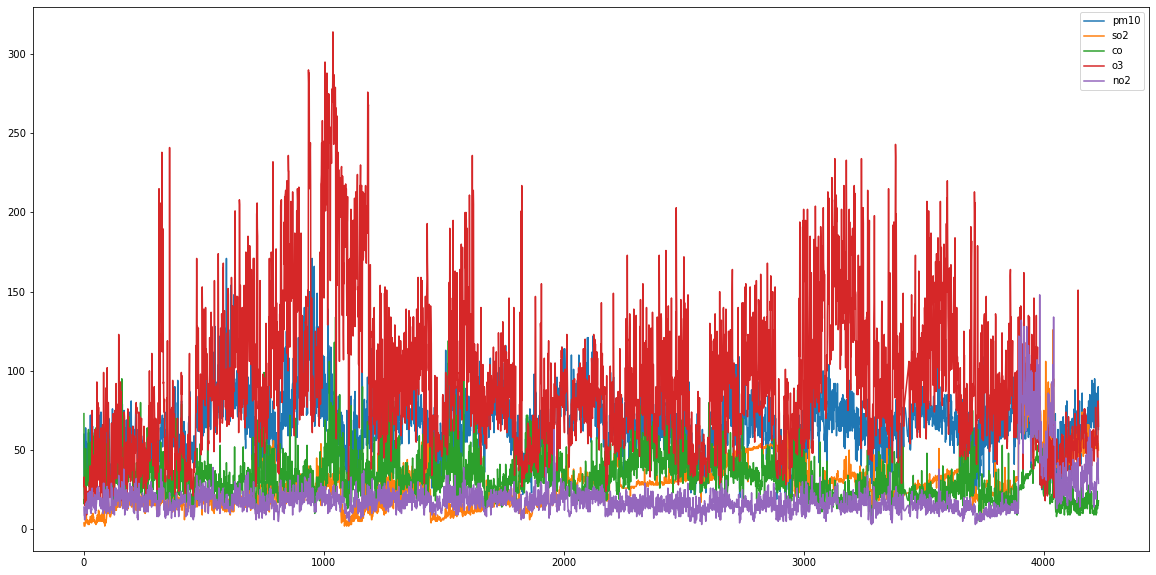

In [112]:
# Visualisasi Data

plt.figure(figsize=(20,10))
plt.plot(df_final_temp["pm10"])
plt.plot(df_final_temp["so2"])
plt.plot(df_final_temp["co"])
plt.plot(df_final_temp["o3"])
plt.plot(df_final_temp["no2"])
plt.legend(['pm10', 'so2', 'co', 'o3', 'no2'])
plt.show()

## Export Data

Setelah semua data berhasil digabungkan menjadi satu, maka sebelum dilakukan modeling kita export terlebih dahulu menjadi berkas csv.

Melihat dataset yang ada, ada dua kemungkinan yang dapat dilakukan saat modeling menggunakan dataset ini yaitu:

1. Forecasting salah satu atau semua fitur yang ada
2. Forecasting dan mengkombinasikan dengan klasifikasi fitur categori
3. Klasifikasi fitur categori

Pada proyek ini, akan dilakukan eksperimen pada poin 1 dan 2 untuk menghasilkan model dengan kinerja terbaik. Sehingga akan dilakukan export data untuk pengerjaan forecast dan atau klasifikasi data

### Data for Forecasting

In [113]:
# Mengambil kolom tanggal dan numerik
data_forecasting_final = df_final_temp[df_final_temp.columns[:6]]
data_forecasting_final

,tanggal,pm10,so2,co,o3,no2
0,2010-01-01,60.0,4.0,73.0,27.0,14.0
1,2010-01-02,32.0,2.0,16.0,33.0,9.0
2,2010-01-03,27.0,2.0,19.0,20.0,9.0
3,2010-01-04,22.0,2.0,16.0,15.0,6.0
4,2010-01-05,25.0,2.0,17.0,15.0,8.0
...,...,...,...,...,...,...
4225,2021-07-27,82.0,56.0,13.0,41.0,35.0
4226,2021-07-28,82.0,53.0,18.0,40.0,45.0
4227,2021-07-29,78.0,52.0,18.0,53.0,39.0
4228,2021-07-30,90.0,54.0,15.0,81.0,35.0


In [114]:
# Menyimpan ke CSV
data_forecasting_final.to_csv("data_forecasting_final.csv", index=False)

### Data for Classification

In [115]:
# Mengambil semua kolom kecuali tanggal
data_classification_temp = df_final_temp[df_final_temp.columns[1:]]
data_classification_temp

,pm10,so2,co,o3,no2,categori
0,60.0,4.0,73.0,27.0,14.0,SEDANG
1,32.0,2.0,16.0,33.0,9.0,BAIK
2,27.0,2.0,19.0,20.0,9.0,BAIK
3,22.0,2.0,16.0,15.0,6.0,BAIK
4,25.0,2.0,17.0,15.0,8.0,BAIK
...,...,...,...,...,...,...
4225,82.0,56.0,13.0,41.0,35.0,TIDAK SEHAT
4226,82.0,53.0,18.0,40.0,45.0,TIDAK SEHAT
4227,78.0,52.0,18.0,53.0,39.0,TIDAK SEHAT
4228,90.0,54.0,15.0,81.0,35.0,TIDAK SEHAT


In [116]:
# Mengecek nilai unik dari kolom target categori
data_classification_temp.categori.unique()

array(['SEDANG', 'BAIK', 'TIDAK SEHAT', nan, 'SANGAT TIDAK SEHAT',
       'BERBAHAYA'], dtype=object)

In [117]:
# Menyiapkan data test yang merupakan data dengan categori bernilai NaN
test_data_classification = data_classification_temp[data_classification_temp.categori.isnull()]
test_data_classification.drop(columns=['categori'], inplace=True)
test_data_classification.reset_index(drop=True, inplace=True)
test_data_classification

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,pm10,so2,co,o3,no2
0,58.509243,18.425926,29.222222,42.760012,22.213508
1,68.781558,14.471925,33.358762,51.942339,20.987288
2,31.687500,11.993007,21.343750,25.950862,10.232639
3,72.437350,22.073287,24.551591,77.545148,11.786230
4,74.804160,22.146537,24.858341,79.041463,11.677219
5,76.213284,22.219348,24.946994,80.494536,11.661887
6,76.777581,22.291317,24.844293,81.909962,11.729158
7,76.609904,22.362043,24.576982,83.293332,11.867954
8,75.823110,22.431122,24.171805,84.650238,12.067197
9,74.530055,22.498152,23.655506,85.986273,12.315809


In [118]:
# Menyimpan data test ke csv
test_data_classification.to_csv("test_data_classification.csv", index=False)

In [119]:
# Menyiapkan data train yang merupakan data dengan categori tidak bernilai NaN
train_data_classification = data_classification_temp[~data_classification_temp.categori.isnull()]
train_data_classification.reset_index(drop=True, inplace=True)
train_data_classification

,pm10,so2,co,o3,no2,categori
0,60.0,4.0,73.0,27.0,14.0,SEDANG
1,32.0,2.0,16.0,33.0,9.0,BAIK
2,27.0,2.0,19.0,20.0,9.0,BAIK
3,22.0,2.0,16.0,15.0,6.0,BAIK
4,25.0,2.0,17.0,15.0,8.0,BAIK
...,...,...,...,...,...,...
4202,82.0,56.0,13.0,41.0,35.0,TIDAK SEHAT
4203,82.0,53.0,18.0,40.0,45.0,TIDAK SEHAT
4204,78.0,52.0,18.0,53.0,39.0,TIDAK SEHAT
4205,90.0,54.0,15.0,81.0,35.0,TIDAK SEHAT


In [120]:
# Mengecek nilai unik categori pada data train
train_data_classification.categori.unique()

array(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT', 'BERBAHAYA'],
      dtype=object)

In [121]:
# Melakukan encoding pada categori
categori_encoder = LabelEncoder()
encoded_categori = categori_encoder.fit_transform(train_data_classification['categori'])

In [122]:
print("Before Encoding:", list(train_data_classification['categori'][:10]))
print("After Encoding:", encoded_categori[:10])
print("The inverse from the encoding result:", categori_encoder.inverse_transform(encoded_categori[:10]))

Before Encoding: ['SEDANG', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'BAIK', 'SEDANG', 'SEDANG', 'BAIK']
After Encoding: [3 0 0 0 0 0 0 3 3 0]
The inverse from the encoding result: ['SEDANG' 'BAIK' 'BAIK' 'BAIK' 'BAIK' 'BAIK' 'BAIK' 'SEDANG' 'SEDANG'
 'BAIK']


In [127]:
# Menampilkan seluruh categori
categori_encoder.classes_

array(['BAIK', 'BERBAHAYA', 'SANGAT TIDAK SEHAT', 'SEDANG', 'TIDAK SEHAT'],
      dtype=object)

In [123]:
# Memperbarui nilai categori pada data train dengan categori yang telah di-encode
train_data_classification.categori = encoded_categori

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [124]:
train_data_classification

,pm10,so2,co,o3,no2,categori
0,60.0,4.0,73.0,27.0,14.0,3
1,32.0,2.0,16.0,33.0,9.0,0
2,27.0,2.0,19.0,20.0,9.0,0
3,22.0,2.0,16.0,15.0,6.0,0
4,25.0,2.0,17.0,15.0,8.0,0
...,...,...,...,...,...,...
4202,82.0,56.0,13.0,41.0,35.0,4
4203,82.0,53.0,18.0,40.0,45.0,4
4204,78.0,52.0,18.0,53.0,39.0,4
4205,90.0,54.0,15.0,81.0,35.0,4


In [125]:
# Menyimpan data train ke berkas csv
train_data_classification.to_csv("train_data_classification.csv", index=False)

### Compress CSV to ZIP

In [126]:
!zip data.zip *.csv

  adding: data_forecasting_final.csv (deflated 75%)
  adding: test_data_classification.csv (deflated 53%)
  adding: train_data_classification.csv (deflated 75%)
